# Semantic Similarity Analysis in Knowledge Graphs


## Data Preparation Motivation:

The dataset used in this project comprises a curated list of papers focusing on knowledge graphs and reasoning. This collection, sourced from the Elicit website, represents a rich body of work pivotal for understanding the advancements in knowledge representation and inference.

To ensure that our analysis operates on clean and uniform data, we perform essential preprocessing steps on the paper titles and abstracts. This preprocessing includes the removal of non-alphanumeric characters and case normalization. Such cleansing is crucial as it reduces noise and variation in the text, allowing for more accurate computational linguistics techniques to be applied subsequently.

Our objective with this clean data is to delve into semantic analysis, where we aim to extract meaningful patterns and insights. The processed text will serve as a foundation for calculating semantic similarities and exploring the nuanced interplay between various concepts within the realm of knowledge graphs.


In [1]:
import pandas as pd
import numpy as np
import re

# Load the CSV file
file_path = '/content/paper_list.csv'  # Replace with your CSV file path
data = pd.read_csv(file_path, encoding='ISO-8859-1', usecols=['papers'])

# Function to preprocess and clean text
def clean_text(text):
    # Simple text cleaning process (customize as needed)
    text = re.sub(r'\W+', ' ', text)  # Remove all non-word characters
    text = text.lower()  # Convert to lowercase
    return text

# Preprocess the text data in the 'papers' column
data['Cleaned_Papers'] = data['papers'].apply(clean_text)

## Semantic Embedding Analysis:

This section of the code utilizes the power of the Universal Sentence Encoder (USE) to transform the cleaned text data from academic papers into high-dimensional vectors. These embeddings capture the deep semantic context of words and sentences, beyond the superficial level of keyword matching.

By encoding the text data and predefined key terms such as "uncertainty", "probability", and "causality", we generate dense vector representations that facilitate the measurement of semantic similarity. The cosine distance between the vectors is calculated to quantify this similarity, providing a metric for the relevance of each paper to the specified terms.

The resulting similarity scores are appended to the DataFrame as new columns, offering a comprehensive view of how each paper aligns with the core concepts under investigation. This quantification serves as a foundational step in our broader analysis, enabling us to identify and prioritize papers based on their semantic relatedness to pivotal themes in knowledge graph research.




In [2]:
import tensorflow_hub as hub
import pandas as pd
from scipy.spatial import distance

# Load the Universal Sentence Encoder model
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

# Assuming your DataFrame 'data' is already loaded
# data = pd.read_csv('your_csv_file.csv', encoding='ISO-8859-1')

# Generate embeddings for the 'Cleaned_Papers' column
paper_embeddings = embed(data['Cleaned_Papers'])

# Generate embeddings for the terms
terms = ["uncertainty", "probability", "causality", "counterfactuality", "randomness", "fuzziness", "quantumness", "information_entropy"]
term_embeddings = embed(terms)

# Initialize columns for similarities
data['Uncertainty_Similarity'] = 0.0
data['Probability_Similarity'] = 0.0
data['Causality_Similarity'] = 0.0
data['Counterfactuality_Similarity'] = 0.0
data['Randomness_Similarity'] = 0.0
data['Fuzziness_Similarity'] = 0.0
data['Quantumness_Similarity'] = 0.0
data['Information_Entropy_Similarity'] = 0.0

# Calculate the similarities
for i, paper_emb in enumerate(paper_embeddings):
    data.at[i, 'Uncertainty_Similarity'] = 1 - distance.cosine(paper_emb, term_embeddings[0])
    data.at[i, 'Probability_Similarity'] = 1 - distance.cosine(paper_emb, term_embeddings[1])
    data.at[i, 'Causality_Similarity'] = 1 - distance.cosine(paper_emb, term_embeddings[2])
    data.at[i, 'Counterfactuality_Similarity'] = 1 - distance.cosine(paper_emb, term_embeddings[3])
    data.at[i, 'Randomness_Similarity'] = 1 - distance.cosine(paper_emb, term_embeddings[4])
    data.at[i, 'Fuzziness_Similarity'] = 1 - distance.cosine(paper_emb, term_embeddings[5])
    data.at[i, 'Quantumness_Similarity'] = 1 - distance.cosine(paper_emb, term_embeddings[6])
    data.at[i, 'Information_Entropy_Similarity'] = 1 - distance.cosine(paper_emb, term_embeddings[7])


# Display the updated DataFrame
print(data.head())


                                              papers  \
0  Swift Markov Logic for Probabilistic Reasoning...   
1  Towards Loosely-Coupling Knowledge Graph Embed...   
2  Knowledge Graph Reasoning with Logics and Embe...   
3  An Overview of Knowledge Graph Reasoning: Key ...   
4  Analysis of Knowledge Graph Path Reasoning Bas...   

                                      Cleaned_Papers  Uncertainty_Similarity  \
0  swift markov logic for probabilistic reasoning...                0.098904   
1  towards loosely coupling knowledge graph embed...                0.047389   
2  knowledge graph reasoning with logics and embe...                0.053716   
3  an overview of knowledge graph reasoning key t...                0.055256   
4  analysis of knowledge graph path reasoning bas...                0.016904   

   Probability_Similarity  Causality_Similarity  Counterfactuality_Similarity  \
0                0.200050              0.200271                     -0.069599   
1                0.0

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803 entries, 0 to 802
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   papers                          803 non-null    object 
 1   Cleaned_Papers                  803 non-null    object 
 2   Uncertainty_Similarity          803 non-null    float64
 3   Probability_Similarity          803 non-null    float64
 4   Causality_Similarity            803 non-null    float64
 5   Counterfactuality_Similarity    803 non-null    float64
 6   Randomness_Similarity           803 non-null    float64
 7   Fuzziness_Similarity            803 non-null    float64
 8   Quantumness_Similarity          803 non-null    float64
 9   Information_Entropy_Similarity  803 non-null    float64
dtypes: float64(8), object(2)
memory usage: 62.9+ KB


##Visualizing Semantic Similarities:

The visualization code block is designed to provide a comparative overview of the semantic similarity scores across various conceptual dimensions. The plot includes lines for "Uncertainty Similarity", "Probability Similarity", "Causality Similarity", among others, each representing a different facet of the complex concept of uncertainty as it relates to knowledge graphs and reasoning.

Through this visual representation, we aim to discern patterns and relationships between the papers and these key concepts. The use of a line plot allows for the identification of trends across the corpus, highlighting papers that exhibit strong associations with the terms of interest.

The graph's x-axis represents the index of each paper in the dataset, serving as an identifier rather than a quantitative measure. The y-axis reflects the computed similarity scores, with higher values indicating a closer semantic relation to the respective concept. The choice of a larger figure size ensures readability and clarity, accommodating the multiple lines that represent each of the conceptual categories.

By examining this plot, researchers and practitioners can quickly gauge the relevance and contribution of each paper to the broader discourse on uncertainty in knowledge graph research.


<ipython-input-4-2f9290df2d82>:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  column_averages = data.mean().sort_values(ascending=False)


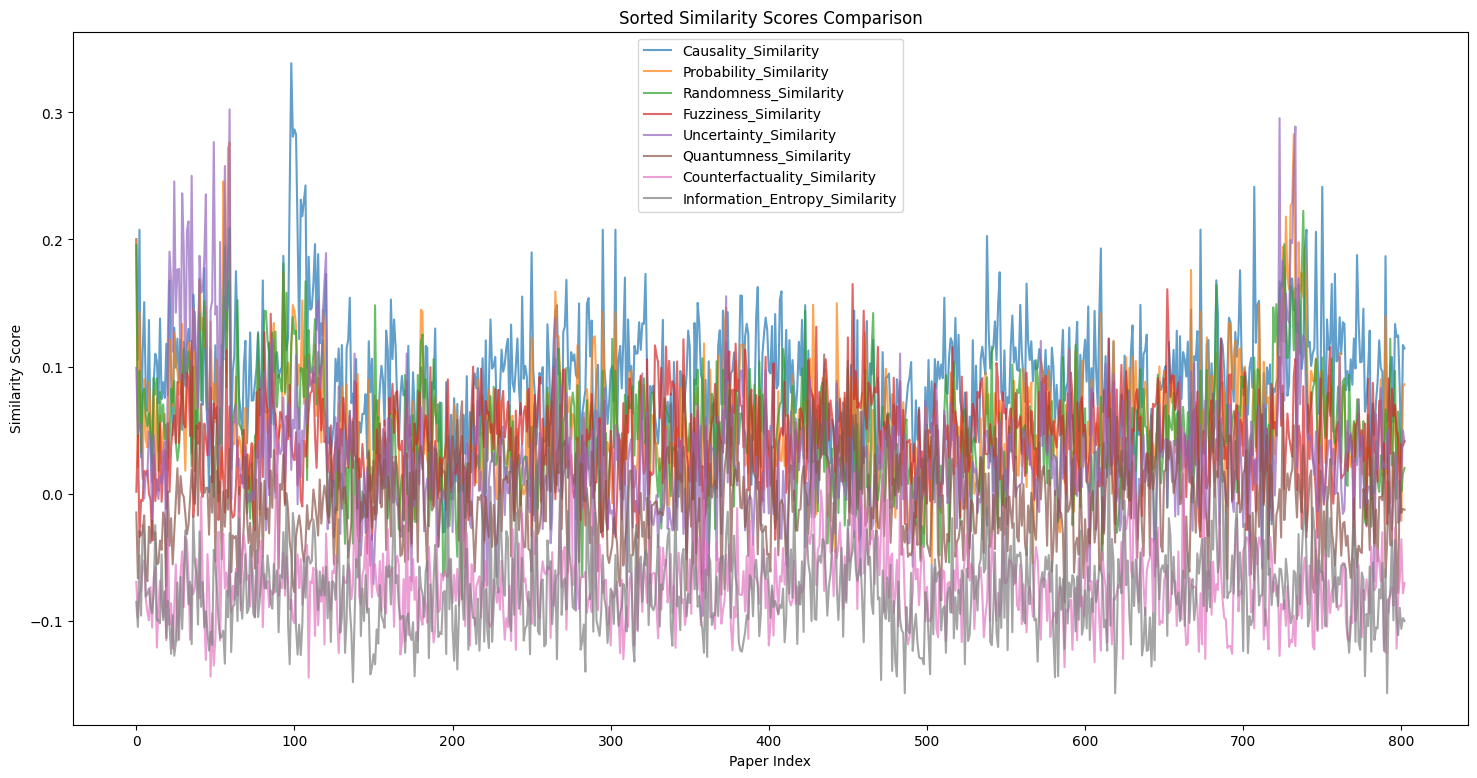

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Calculate the average of each similarity column
column_averages = data.mean().sort_values(ascending=False)

# Plotting the similarity scores
plt.figure(figsize=(18, 9))

# Plot each similarity column in sorted order
for column in column_averages.index:
    plt.plot(data[column], label=column, alpha=0.7)

# Adding labels, title, and legend
plt.title('Sorted Similarity Scores Comparison')
plt.xlabel('Paper Index')
plt.ylabel('Similarity Score')
plt.legend()

# Show the plot
plt.show()


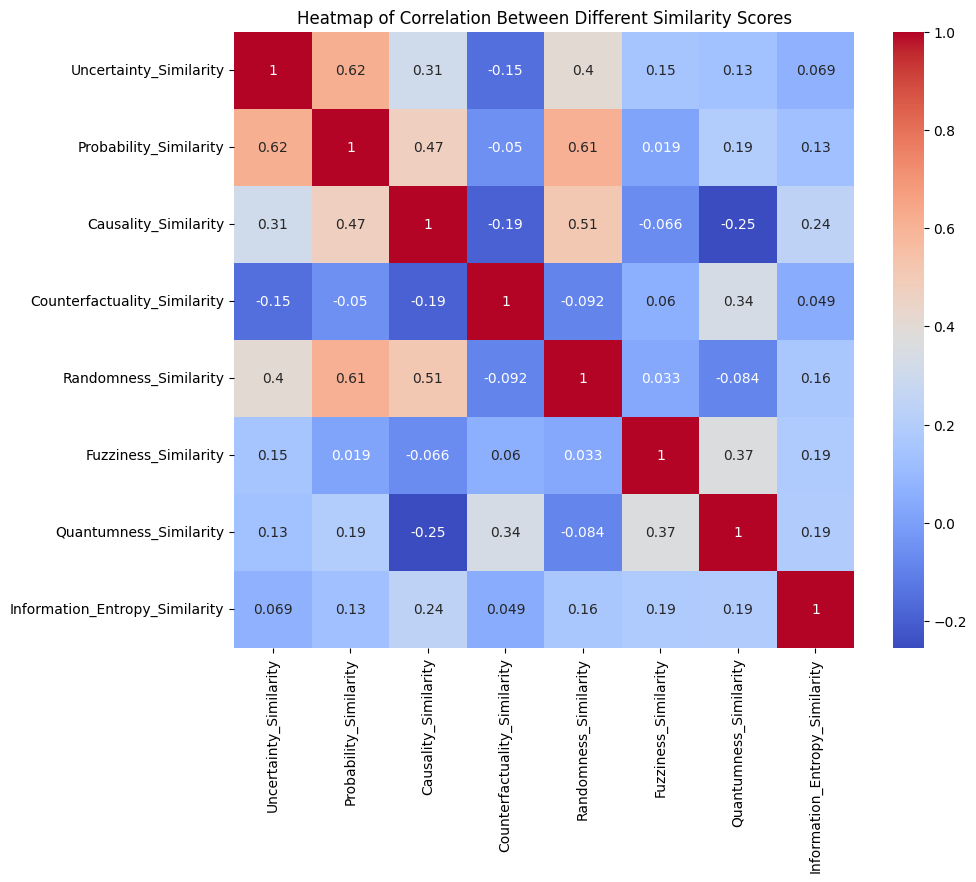

In [7]:
import seaborn as sns

# Preparing the data for box plots
similarity_data = data[['Uncertainty_Similarity', 'Probability_Similarity', 'Causality_Similarity',
                        'Counterfactuality_Similarity', 'Randomness_Similarity', 'Fuzziness_Similarity',
                        'Quantumness_Similarity', 'Information_Entropy_Similarity']]

# Calculating the correlation matrix
correlation_matrix = similarity_data.corr()

# Creating a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Between Different Similarity Scores')
plt.show()


## Interpretation of Specific Values:

The diagonal, which is all dark red, represents the correlation of each similarity score with itself, which is always a perfect
The Uncertainty_Similarity and Probability_Similarity have a relatively high positive correlation of 0.62, indicating that papers that are similar to one concept are often also similar to the other.
Counterfactuality_Similarity seems to have low or slightly negative correlations with most other scores, suggesting a more unique or distinct set of papers associated with this score.

##Identifying Key Papers in Semantic Similarity Research:

In this segment of the code, we aggregate the individual similarity scores for each paper to compute a 'Total Similarity' metric. This metric is a summation of similarities across various dimensions, including 'Uncertainty', 'Probability', 'Causality', and other conceptual categories pertinent to knowledge graph analysis.

By summing these scores, we generate a composite measure that reflects each paper's overall semantic alignment with the key terms under consideration. The papers are then ranked based on their 'Total Similarity', enabling us to identify which ones are most centrally related to the collective themes of the research corpus.

We then extract the top 10 papers from this ranked list, which represent the cornerstone of our dataset. These papers are presumed to be the most relevant and influential regarding the discussed concepts, based on their semantic proximity to the key terms.

This prioritized list of papers serves as a valuable resource for researchers seeking the most significant contributions in the field or for practitioners looking to build upon well-established foundations within the domain of knowledge graphs and uncertainty.


In [8]:
# Assuming 'data' is your DataFrame containing the similarity scores
similarity_columns = ['Uncertainty_Similarity', 'Probability_Similarity', 'Causality_Similarity',
                      'Counterfactuality_Similarity', 'Randomness_Similarity', 'Fuzziness_Similarity',
                      'Quantumness_Similarity', 'Information_Entropy_Similarity']

# Calculate the total similarity for each paper
data['Total_Similarity'] = data[similarity_columns].sum(axis=1)

# Sort the papers by total similarity in descending order
sorted_papers = data.sort_values(by='Total_Similarity', ascending=False)

# Select the top 10 papers
top_10_papers = sorted_papers.head(10)

# Display the top 10 papers
print(top_10_papers)


                                                papers  \
59   Integrated Uncertainty in Knowledge Modelling ...   
732  Calibrated Predictive Distributions via Diagno...   
723  Uncertainty-aware Prediction Validator in Deep...   
725  Uncertainty-Aware Learning against Label Noise...   
733  Uncertainty-Aware Prediction Validator in Deep...   
738  Nonstationary Bandit Learning via Predictive S...   
40   Measuring uncertainty in graph cut solutions,T...   
93   A hierarchy of randomness for graphs,The four ...   
739  Non-Bayesian updating in a social learning exp...   
58   Computing and Maintaining Provenance of Query ...   

                                        Cleaned_Papers  \
59   integrated uncertainty in knowledge modelling ...   
732  calibrated predictive distributions via diagno...   
723  uncertainty aware prediction validator in deep...   
725  uncertainty aware learning against label noise...   
733  uncertainty aware prediction validator in deep...   
738  nonstati